¡ Hola Juan! Como te va?



 Mi nombre es Facundo Lozano! Ya he tenido el agrado de revisar otros proyectos tuyos, nuevamente seré tu revisor en este proyecto.



Como siempre, a continuación un poco sobre la modalidad de revisión que usaremos:



 Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.



 Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.



 Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:



 <div class="alert alert-block alert-success">

 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Exito. Todo se ha hecho de forma exitosa.

 </div>



 <div class="alert alert-block alert-warning">

 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Observación. Algunas recomendaciones.

 </div>



 <div class="alert alert-block alert-danger">



 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos.

 </div>



 Puedes responder utilizando esto:



 <div class="alert alert-block alert-info">

 <b>Respuesta de estudiante.</b> <a class="tocSkip"></a>

 </div>

## Inicialización

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Juan, siempre me tomo este tiempo al inicio del proyecto para comentar mis apreciaciones generales de esta primera iteración de la entrega. 

Siempre me gusta comenzar dando la bienvenida al mundo de los datos a los estudiantes, te deseo lo mejor y espero que consigas lograr tus objetivos. Personalmente siempre me gusta brindar el siguiente consejo, "Está bien equivocarse, es normal y es lo mejor que te puede pasar. Aprendemos de los errores y eso te hará mejor programador ya que podrás descubrir cosas a medida que avances y son estas cosas las que te darán esa experiencia para ser un gran cientifico de datos."
    
Ahora si yendo a esta notebook. Juan, lo he dicho al final del proyecto pero lo resalto aquí nuevamente, tu proyecto está muy bien resuelto, resalta capacidad y comprensión de todas las herrramientas, como a la vez esta ordenado y es sencillo de seguir, felictiaciones!

Este proyecto está en condiciones de ser aprobado! Éxitos dentro de tu camino en el mundo de los datos!

Saludos Juan!

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/` 
- La carpeta `final_files` con 7600 fotos 
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age` 
Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [3]:
labels = pd.read_csv('/datasets/faces/labels.csv')

In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [5]:
print(labels.describe())

          real_age
count  7591.000000
mean     31.201159
std      17.145060
min       1.000000
25%      20.000000
50%      29.000000
75%      41.000000
max     100.000000


In [6]:
display(labels.sample(5))

,file_name,real_age
7139,007155.jpg,27
2014,002014.jpg,23
4131,004131.jpg,47
3623,003623.jpg,22
1007,001007.jpg,27


In [7]:
print(labels.duplicated().sum())

0


***Conclusión***

Se cargaron los datos en el archivo csv `/datasets/faces/labels.csv`. Se hizo una exploración inicial de datos y sabemos que el dataset sólo tiene la columna con el nombre del archivo de la imagen y otra columna con las edades de las personas de las imágenes.

No se encontraron datos duplicados ni ausentes y sabemos que el mínimo de edad es de 1 año y el máximo de edad es de 100 años.

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Hasta aquí excelente Juan, una importación de librerías perfecta por separado de la carga de los datos y a la vez excelente implementación de métodos para observar la composición de los datos! Bien hecho!

## EDA

Veamos la distribución de edad del dataset. 

Se va a crear una gráfica de barras para poder apreciar las edades y un boxplot.

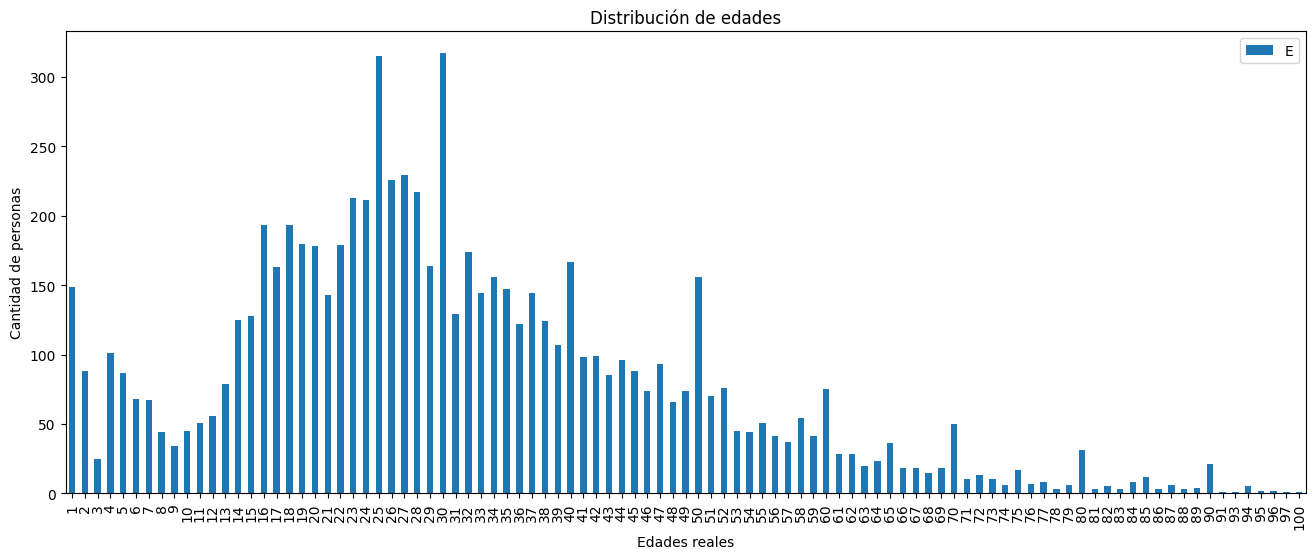

In [8]:
# Gráfica de barras
fig, ax = plt.subplots(figsize=(16,6))

dft = labels.groupby('real_age').count()
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Distribución de edades')
ax.set_xlabel('Edades reales')
ax.set_ylabel('Cantidad de personas')
ax.legend(labels='Edad')

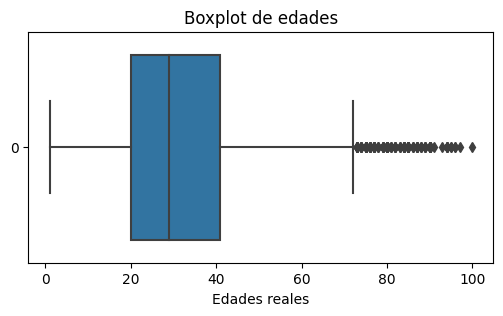

In [9]:
# Boxplot
plt.figure(figsize=(6,3))
sns.boxplot(data=labels['real_age'], orient="h")
plt.title('Boxplot de edades')
plt.xlabel('Edades reales')
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Bien hecho Juan! Tal como debiamos hemos profundizado sobre la distribución de las edades de nuestros datos, excelente implementación tanto de el histograma como el box plot.

***Imprimir imágenes***

Vamos a imprimir 12 imágenes para obtener información general del dataset. Podemos comprobar si es verda que hay imágenes de personas de diferente edad.

In [10]:
# Creamos el generador de imágenes reduciendo la escala de 0 a 1
datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# Creamos nuestro lote de 12 imágenes
datagen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=12,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


Hay un total de 7591 imágenes, pero en nuestro lote sólo pondremos 12 para imprimirlas y poder observar que son imágenes de personas aon diferente edad.

In [12]:
# Obtenemos el lote de 12 imágenes
batch_images, batch_labels = next(datagen_flow)

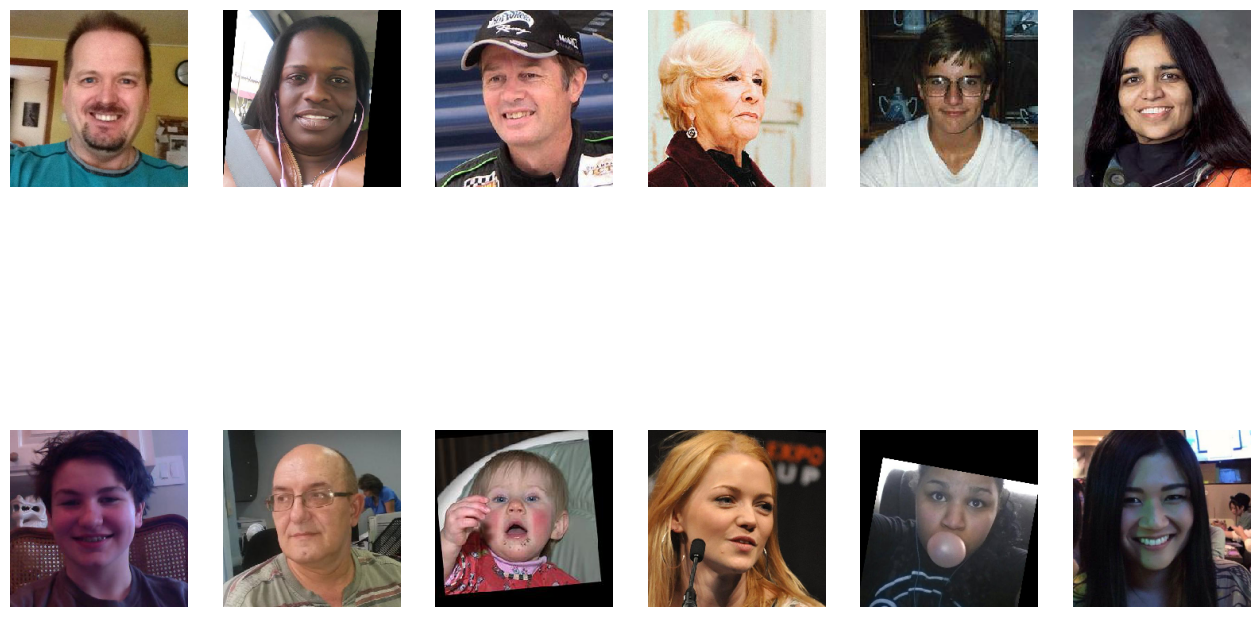

In [13]:
# Crea la figura con 12 subplots
fig, axs = plt.subplots(2, 6, figsize=(16, 10))

# Loop a través de las imágenes y las imprime
for i, ax in enumerate(axs.flat):
    ax.imshow(batch_images[i])
    ax.axis('off')

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente creación del ImageDataGenerator y del lote como así la visualización de las imagenes con las que trabajaremos, sigamos!

### Conclusiones

* Con las gráficas podemos ver que hay una mayor cantidad de personas que se encuentran entre los 20 y 40 años de edad. Siendo los 25 y 30 años las edades que más predominan, ya que hay más de 300 personas que tienen estas edades respectivamente.

* También se puede apreciar en la gráfica "Distribución de edades" que a partir de los 29 a 30 años la gráfica comienza a descender al grado que hay muy poca gente con más de 80 años.

* Con nuestro lote de 12 imágenes podemos ver claramente que las imágenes **si** pertenecen a personas de diferentes edades

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crea un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [14]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [15]:
def load_train(path):
    
    """
    Carga la parte de entrenamiento del conjunto de datos desde la ruta.
    """
    
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1./255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

In [16]:
def load_test(path):
    
    """
    Carga la parte de validación/prueba del conjunto de datos desde la ruta
    """
    
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Muy buen armadas las funciones Juan, aquí podríamos probar diferentes valores del lote para observar si hay mejoras de eficiencia en los modelos, pero por otro lado excelente al mantenter los tamaños de entrada iguales. Sigamos!

In [18]:
def create_model(input_shape):
    
    """
    Define el modelo
    """
    
    backbone = ResNet50(weights='imagenet',
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente creación de modelo Juan, en primera instancia implementando el modelo sugerido Resnet50, y luego creando la estructura del modelo aplicando tanto capas como el optimizador y compilando. Una forma de visualizar mejoras en los modelos es probando diferentes tasas de aprendizaje o la agregación de mayor cantidad de capas.

In [19]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Entrena el modelo dados los parámetros
    """
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Un armado perfecto Juan, bien hecho! Aquí podríamos agregar al inicio la línea **%%time** para observar el tiempo que demora esta ejecución.

## Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

In [20]:
# prepara un script para ejecutarlo en la plataforma GPU

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

In [21]:
# Script que se colocó en el modelo para el GPU
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1./255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow

def create_model(input_shape):
    backbone = ResNet50(weights='imagenet',
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

***Se coloca todo el scropt porque así lo solicita el ejercicio, a pesar de que el código se repite***

### El resultado

Coloca el resultado de la plataforma GPU como una celda Markdown aquí.

El resultado de la plataforma GPU es de 6.9021

<div class="alert alert-block alert-success">
<b>Comentario del revisocr. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente procedimiento Juan, desde la implementación a lo largo del proyecto hasta el script final con el resultado expuesto!

## Conclusiones

* Se realiza un Análisis exploratorio donde concluimos que las imágenes son de diferentes personas con diferentes edades y pudimos ver que hay más personas de entre 20 y 40 años.

* El modelo entrenado arrojó un MAE de 6.90. El cuál es menor que 8 que se solicita. Con esto decimos que nuestro modelo se equivoca en promedio por 7 años al momento de hacer una predicción de edad. Se concluye que nuestro modelo funciona.

<div class="alert alert-block alert-success">
<b>Comentario del revisocr. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente conclusión Juan, destaco el rendimiento exitoso del modelo y sobre todo el procedimiento aplicado. El modelo cumple con los criterios establecidos y tus conclusiones demuestran tu comprensión de lo aplicado y obtenido. Felicitaciones!

# Lista de control

- [x]  El Notebook estaba abierto 
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en el orden de ejecución
- [x]  Se realizó el análisis exploratorio de datos 
- [x]  Los resultados del análisis exploratorio de datos se presentan en el notebook final 
- [x]  El valor EAM del modelo no es superior a 8 
- [x]  El código de entrenamiento del modelo se copió en el notebook final 
- [x]  El resultado de entrenamiento del modelo se copió en el notebook final 
- [x] Los hallazgos se proporcionaron con base en los resultados del entrenamiento del modelo